# Importar a tabela com as features e rótulos

**Importante**: para rodar esse notebook, é necessário criar um atalho na raiz do seu Google Drive para a pasta do Grupo 1 no Google Drive da sala e ter as permissões de acesso adequadas. Siga o passo a passo no notebook [neste link](https://colab.research.google.com/drive/1gcgucA_kH5xj9dncwh1sUfaLRROkbm3G#scrollTo=GJe2F3xyOayd), substituindo a pasta "Base" por "Grupo 1 - RappiIA" 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df_infos = pd.read_csv('/content/drive/MyDrive/Grupo 1 - RappIA /features.csv', index_col=0)
df_infos

,ID,IS_CHURN,LEVEL_NAME,AUTO_ACCEPT,ACCEPTANCE_RATE,ORDERS_DONE,ORDERS_LAST_30D_COUNT,ORDERS_CANCEL,ORDERS_CANCELED_LAST_30D_COUNT,FIRST_ORDER_DATE,...,PRODUCT_RETURNS,SUPPORT_TICKET_COUNT,DEFECTS_COUNT,AVG_DISTANCE_TO_USER,TRANSPORT_bicycle,TRANSPORT_car,TRANSPORT_motorbike,TRANSPORT_neither,TRANSPORT_cargo_van,TRANSPORT_motorbike_trailer
0,1552668,False,1,True,1.00000,0,4,1,0,738354,...,0.000,0,2,3.765437,0,0,1,0,0,0
1,1552649,False,3,True,0.77800,4,122,1,2,738353,...,0.000,0,8,4.014581,0,0,1,0,0,0
2,1552604,False,2,True,1.00000,3,57,0,1,738353,...,0.000,0,9,1.517087,1,0,0,0,0,0
3,1552588,False,4,True,0.00000,1,59,0,2,738354,...,0.000,0,7,2.256725,0,1,0,0,0,0
4,1552553,False,1,True,0.88870,3,9,0,0,738353,...,0.000,0,5,2.736529,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159523,33189,True,2,True,0.16240,396,0,17,0,738005,...,-2.145,101,105,2.074419,0,1,0,0,0,0
159524,33188,True,0,False,0.89450,12,0,1,0,738089,...,0.000,57,3,4.168917,0,0,1,0,0,0
159525,33161,True,2,False,0.45120,2625,4,55,1,738003,...,-72.440,0,227,3.668000,0,0,1,0,0,0
159526,33051,True,2,True,0.80570,2311,0,49,0,738089,...,-0.025,28,104,1.318292,1,0,0,0,0,0


# Separar as features dos rótulos

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo x e y
# features que estão com algum problema: X = df_infos[[ 'ORDERS_LAST_30D_COUNT', 'LAST_ORDER_DATE', 'SUPPORT_TICKET_COUNT']]
X = df_infos[[
              'LEVEL_NAME', 
              'AUTO_ACCEPT', 'ACCEPTANCE_RATE', 
              'ORDERS_DONE', 
              'ORDERS_CANCEL', 'ORDERS_CANCELED_LAST_30D_COUNT', 
              'FIRST_ORDER_DATE', 
              'EARNINGS', 'TIPS', 
              'PUNISHMENT_MINUTES', 'PRODUCT_RETURNS', 
              'DEFECTS_COUNT', 
              'AVG_DISTANCE_TO_USER', 
              'TRANSPORT_bicycle','TRANSPORT_car', 'TRANSPORT_motorbike', 'TRANSPORT_neither', 'TRANSPORT_cargo_van', 'TRANSPORT_motorbike_trailer',
            ]]
y = df_infos[['IS_CHURN']]



# Separar datasets de teste e de treino

In [ ]:
# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
x_train.shape

(111669, 19)

In [ ]:
y_train.shape

(111669, 1)

# Normalizar os dados

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()
scaler.fit(x_train)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train, columns = X.columns)


In [ ]:
x_train

,LEVEL_NAME,AUTO_ACCEPT,ACCEPTANCE_RATE,ORDERS_DONE,ORDERS_CANCEL,ORDERS_CANCELED_LAST_30D_COUNT,FIRST_ORDER_DATE,EARNINGS,TIPS,PUNISHMENT_MINUTES,PRODUCT_RETURNS,DEFECTS_COUNT,AVG_DISTANCE_TO_USER,TRANSPORT_bicycle,TRANSPORT_car,TRANSPORT_motorbike,TRANSPORT_neither,TRANSPORT_cargo_van,TRANSPORT_motorbike_trailer
0,0.298428,0.814950,0.374067,1.351065,1.574274,-0.273713,-0.052758,0.868478,0.941993,-0.271562,-0.113449,0.945891,-0.143058,-0.716403,-0.470078,1.041339,-0.008464,-0.002993,-0.004232
1,2.669399,0.814950,0.107947,1.791310,0.770385,2.698619,0.996134,3.043137,4.297363,-0.271715,0.206328,1.301935,0.788619,-0.716403,-0.470078,1.041339,-0.008464,-0.002993,-0.004232
2,0.298428,-1.227069,-1.320880,0.148757,-0.033504,0.469370,-0.959428,1.086776,1.349636,-0.271660,0.206328,1.451849,0.673564,-0.716403,2.127307,-0.960302,-0.008464,-0.002993,-0.004232
3,0.298428,-1.227069,-1.105014,-0.389321,-0.435449,-0.273713,-1.119428,-0.332971,-0.389503,0.952875,0.206328,-0.272156,0.234809,-0.716403,2.127307,-0.960302,-0.008464,-0.002993,-0.004232
4,1.483914,0.814950,0.791713,1.067866,1.976218,-0.273713,-1.074984,1.622125,1.372169,7.076610,-1.215676,2.276373,-0.735060,1.395863,-0.470078,-0.960302,-0.008464,-0.002993,-0.004232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111664,-2.072543,-1.227069,-1.816952,0.074095,-0.435449,-0.273713,-0.754983,0.021203,0.325408,-0.271766,0.206328,0.346237,-0.844376,-0.716403,-0.470078,1.041339,-0.008464,-0.002993,-0.004232
111665,2.669399,0.814950,-0.541554,0.370167,0.207662,2.698619,0.809466,0.705724,0.989108,-0.271708,0.206328,0.514889,0.162522,-0.716403,-0.470078,1.041339,-0.008464,-0.002993,-0.004232
111666,0.298428,-1.227069,-1.819998,-0.330107,-0.435449,-0.273713,0.053909,-0.218970,-0.291177,0.952852,-5.273589,-0.234678,-0.364837,-0.716403,2.127307,-0.960302,-0.008464,-0.002993,-0.004232
111667,0.298428,0.814950,0.353889,-0.126718,-0.435449,-0.273713,-0.826094,-0.436419,-0.463247,-0.271806,0.206328,-0.515766,-0.279941,-0.716403,-0.470078,1.041339,-0.008464,-0.002993,-0.004232


# Fazer o undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_train, y_train = rus.fit_resample(x_train, y_train)

In [ ]:
x_train.shape

(40042, 19)

In [ ]:
y_train.shape

(40042, 1)

# Treinar e avaliar os modelos

## Regressão Logística

### Treinar

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criando o modelo
model = LogisticRegression()
model.fit(x_train, y_train)

# Predizendo
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Avaliar

Feature: LEVEL_NAME, Score: -0.43360
Feature: AUTO_ACCEPT, Score: -0.15422
Feature: ACCEPTANCE_RATE, Score: 0.25361
Feature: ORDERS_DONE, Score: -0.16751
Feature: ORDERS_LAST_30D_COUNT, Score: 0.23513
Feature: ORDERS_CANCEL, Score: -3.14812
Feature: ORDERS_CANCELED_LAST_30D_COUNT, Score: -1.05076
Feature: FIRST_ORDER_DATE, Score: 0.53569
Feature: LAST_ORDER_DATE, Score: 0.24266
Feature: EARNINGS, Score: 1.34109
Feature: TIPS, Score: -0.16864
Feature: PUNISHMENT_MINUTES, Score: -1.70584
Feature: PRODUCT_RETURNS, Score: 0.03224
Feature: SUPPORT_TICKET_COUNT, Score: 0.07748
Feature: DEFECTS_COUNT, Score: 0.00612
Feature: AVG_DISTANCE_TO_USER, Score: -0.07775
Feature: TRANSPORT_bicycle, Score: -0.03013
Feature: TRANSPORT_car, Score: 0.02295
Feature: TRANSPORT_motorbike, Score: -0.00215


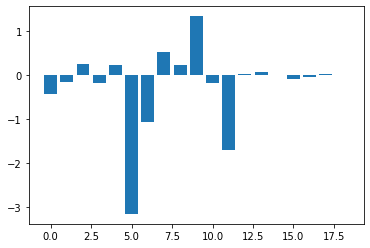

In [ ]:
import matplotlib.pyplot as plt

# Avaliar a importância das features
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (df_infos.columns.values[i + 2],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, recall_score, precision_score, f1_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8906997638897595

In [ ]:
mean_squared_error(y_test, y_pred)

0.10930023611024049

In [ ]:
mean_absolute_error(y_test, y_pred)

0.10930023611024049

In [ ]:
r2_score(y_test, y_pred)

0.24835031867550006

## XGBoost

### Treinar

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Criando modelo
xgb = GradientBoostingClassifier()

#Treinando modelo
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Avaliar

In [ ]:
print('Acc treino', xgb.score(x_train, y_train))
print('Acc teste', xgb.score(x_test, y_test.squeeze()))

Acc treino 0.8877428699865142
Acc teste 0.909797530245095


In [ ]:
y_pred = xgb.predict(x_test)
print('Revocação', recall_score (y_test, y_pred))
print('Precisão', precision_score (y_test, y_pred))
print('F1 Score', f1_score (y_test, y_pred))

Revocação 0.9246834318775852
Precisão 0.9643008362443104
F1 Score 0.9440766889047217


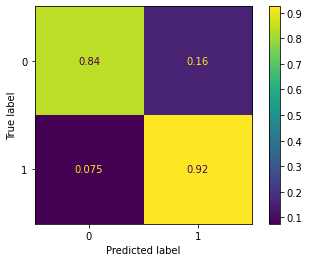

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Light GBM

### Treinar

In [ ]:
import lightgbm as lgb

# Criando o modelo
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

# Predizendo
y_pred = lgb_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Avaliar

In [ ]:
print('Acc treino: ', lgb_model.score(x_train, y_train ))
print('Acc teste: ', lgb_model.score(x_test, y_test.squeeze() ))

Acc treino:  0.9024274511762649
Acc teste:  0.9087736893792181


In [ ]:
y_pred = model.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Revocação:  0.9205724871215774
Precisão:  0.9670514221736465
F1_score:  0.9432397295891836


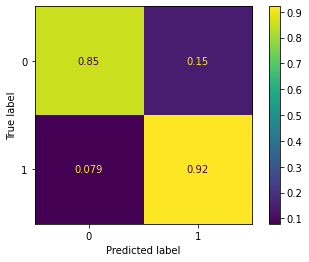

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')

# versão mais compreensível da matriz confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

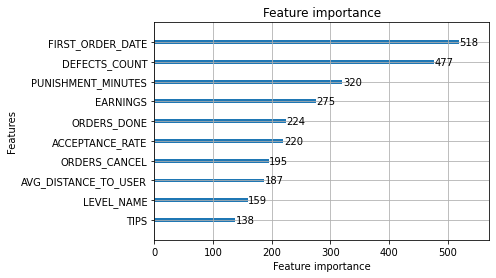

In [ ]:
lgb.plot_importance(lgb_model, max_num_features=10)

## AdaBoost

### Treinar

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Criando o modelo
model = AdaBoostClassifier()
model.fit(x_train, y_train.squeeze())

# Predizendo
y_pred = model.predict(x_test)

### Avaliar

In [ ]:
print('Acc treino: ', model.score(x_train, y_train ))
print('Acc teste: ', model.score(x_test, y_test.squeeze() ))

Acc treino:  0.8789770740722241
Acc teste:  0.9094632148603189


In [ ]:
y_pred = model.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Revocação:  0.9267642804577867
Precisão:  0.9618889591234724
F1_score:  0.9440000000000001


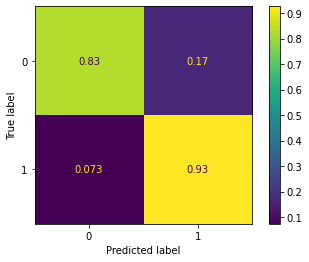

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')

# versão mais compreensível da matriz confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## Random Forest

### Treinar

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo
forest = RandomForestClassifier(max_depth=4)
forest.fit(x_train, y_train.squeeze())

# Predizendo
y_pred = forest.predict(x_test)

### Avaliar

In [ ]:
print('Acc treino: ', forest.score(x_train, y_train ))
print('Acc teste: ', forest.score(x_test, y_test.squeeze() ))

Acc treino:  0.8592977373757554
Acc teste:  0.9176748364988822


In [ ]:
y_pred = model.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Revocação:  0.9499835054685716
Precisão:  0.9523276519969474
F1_score:  0.9511541344309361


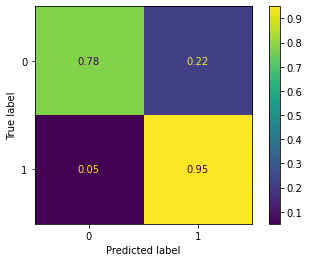

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')

# versão mais compreensível da matriz confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

### Importância das features

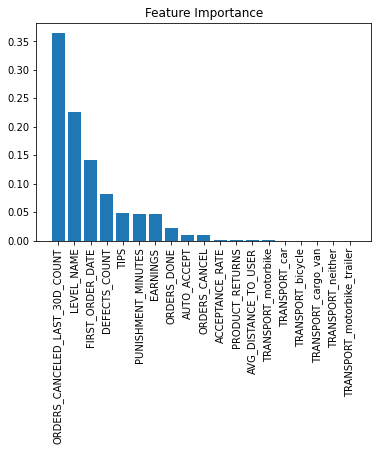

In [ ]:
importances = forest.feature_importances_

# Ordenar importância das features em ordem descrescente
indices = np.argsort(importances)[::-1]

# Reorganizar o nome das features para que fiquem de acordo com a ordem de importância
names = [X.columns[i] for i in indices]

# Criar o objeto do gráfico
plt.show()

# Criar um título
plt.title("Importância das Features - Random Forest")

# Adicionar barras
plt.bar(range(X.shape[1]), importances[indices])

# Adicionar nome das features como rótulos do eixo x
plt.xticks(range(X.shape[1]), names, rotation=90)

# Mostrar o gráfico
plt.show()